In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt


/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
rng = numpy.random
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.243169084 W= 0.47748134 b= -0.83794194
Epoch: 0100 cost= 0.223971024 W= 0.46392778 b= -0.7404385
Epoch: 0150 cost= 0.206989944 W= 0.45118037 b= -0.6487346
Epoch: 0200 cost= 0.191969529 W= 0.43919104 b= -0.56248385
Epoch: 0250 cost= 0.178683743 W= 0.4279148 b= -0.48136333
Epoch: 0300 cost= 0.166932285 W= 0.41730917 b= -0.4050677
Epoch: 0350 cost= 0.156538025 W= 0.40733442 b= -0.33330995
Epoch: 0400 cost= 0.147344172 W= 0.39795288 b= -0.26581964
Epoch: 0450 cost= 0.139212117 W= 0.38912925 b= -0.20234312
Epoch: 0500 cost= 0.132019386 W= 0.38083035 b= -0.14264175
Epoch: 0550 cost= 0.125657439 W= 0.3730251 b= -0.08649123
Epoch: 0600 cost= 0.120030403 W= 0.3656841 b= -0.0336802
Epoch: 0650 cost= 0.115053430 W= 0.3587796 b= 0.015989963
Epoch: 0700 cost= 0.110651419 W= 0.3522858 b= 0.06270596
Epoch: 0750 cost= 0.106758021 W= 0.34617823 b= 0.10664337
Epoch: 0800 cost= 0.103314452 W= 0.3404339 b= 0.14796768
Epoch: 0850 cost= 0.100268804 W= 0.33503112 b= 0.18683444
Epoch: 0900

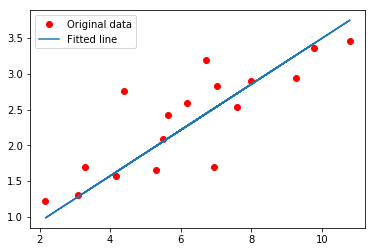

In [8]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()